In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

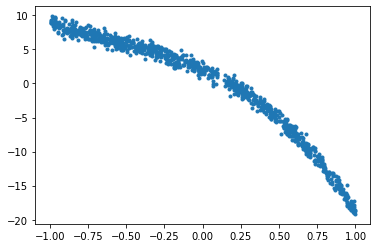

In [2]:
sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set

x_val = np.random.uniform(low = -1, high = 1, size = sample_num)
np.random.shuffle(x_val)
w1 = np.random.randint(low = -10, high = 10)
w2 = np.random.randint(low = -10, high = 10)
w3 = np.random.randint(low = -10, high = 10)
w4 = np.random.randint(low = -10, high = 10)

y = w1*x_val**3 + w2*x_val**2 + w3*x_val + w4
y_val = y + (0.6 * np.random.randn(x_val.shape[0])) # add noise
plt.plot(x_val, y_val, '.')

In [3]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

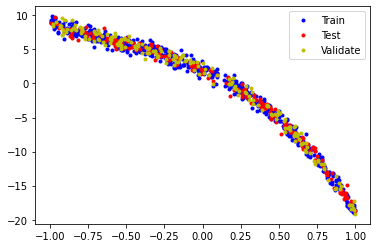

In [4]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [6]:
import itertools

In [7]:
def cost(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

def weighted_sum(x, w, b):
    return b + np.dot(w, x)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))



In [8]:
class Neural_Network(object):
    def __init__(self, n0, n1, n2):        
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        
        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)
        
    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y

    


In [9]:

def get_gradient(net, X, y):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = cost(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2) 
    
    # for the first layer, iterate through each weight, 
    # perturb it slightly, and calculate the numerical 
    # slope between that loss and the original loss
    for i, j in itertools.product(range(net.n0), range(net.n1)):
        net.W1 = np.copy(W1)
        net.W1[i][j] += w_delta
        y_pred = net.predict(X)
        error = cost(y_pred, y)
        dw1[i][j] = (error - error_current) / w_delta

    # do the same thing for the second layer
    for i, j in itertools.product(range(net.n1), range(net.n2)):
        net.W2 = np.copy(W2)
        net.W2[i][j] += w_delta
        y_pred = net.predict(X)
        error = cost(y_pred, y)
        dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

In [10]:
# create a 2x3x1 neural net
net = Neural_Network(2, 3, 1)    

X = x_train
Y = y_train

# what is the current cost?
y_orig = net.predict(X)
init_cost = cost(y_orig, y)
print("initial cost = %0.3f" % init_cost)

# Set the learning rate, and how many epochs (updates) to try
n_epochs = 2000
learning_rate = 0.01

# for each epoch, calculate the gradient, then subtract it from the parameters, and save the cost
errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = cost(y_pred, y)
    errors.append(error)
        
# plot it
plt.plot(range(0, len(errors)), errors, linewidth=2)

# what is the final cost?
y_pred = net.predict(X)
final_cost = cost(y_pred, y)
print("final cost = %0.3f" % final_cost)

NameError: name 'X' is not defined